In [ ]:
#Description: This program predicts if the price of ahouse will be higher than the median price or not

In [62]:
# imort dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from keras.models import Sequential # Initialize 
import plotly.graph_objects as go
import plotly
import plotly.plotly as py
warnings.filterwarnings('ignore')
!!pip3 install plotly

%matplotlib inline 

ModuleNotFoundError: No module named 'keras'

In [63]:
# open the file into the dataframe 

#DATA_DIR = '../data'
#FILE_NAME = 'Housing.csv'
#data_path = os.path.join(DATA_DIR, FILE_NAME)
#datHousing=pd.read_csv(data_path)
#data frame-datHousing
datHeart= pd.read_csv('heart.csv') 
print(datHeart)
datHeart.head()
#datHousing.describe()
#datHousing.shape



     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [64]:
  #  age: The person's age in years
   # sex: The person's sex (1 = male, 0 = female)
  # cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
  #  trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
 # chol: The person's cholesterol measurement in mg/dl
  # fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
  #  restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
  #  thalach: The person's maximum heart rate achieved
  # exang: Exercise induced angina (1 = yes; 0 = no)
 #  oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
  #  slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
  #  ca: The number of major vessels (0-3)
 #   thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
 #  target: Heart disease (0 = no, 1 = yes)

In [65]:
datHeart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
# pre processing 
#check if there will be any missing values
datHeart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:

#  check the summary stat for numerical values the mean value of MEDV=22.532806

datHeart.describe()
#mean = datHeart['Cholesterol'].mean()
#print(round(mean,2))



Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [7]:
# The mean value for RIVERCODE is 0.069.
mean = datHeart['HeartDisease'].mean()
print(round(mean,3))


0.553


In [10]:
datHeart = pd.concat([datHeart, pd.get_dummies(datHeart['Sex'])], axis=1)
datHeart = pd.concat([datHeart, pd.get_dummies(datHeart['ChestPainType'])], axis=1)
datHeart = pd.concat([datHeart, pd.get_dummies(datHeart['RestingECG'])], axis=1)
datHeart = pd.concat([datHeart, pd.get_dummies(datHeart['ExerciseAngina'])], axis=1)
datHeart = pd.concat([datHeart, pd.get_dummies(datHeart['ST_Slope'])], axis=1)
datHeart = datHeart.drop(['Sex'], axis = 1)
datHeart = datHeart.drop(['ChestPainType'], axis = 1)
datHeart = datHeart.drop(['RestingECG'], axis = 1)
datHeart = datHeart.drop(['ExerciseAngina'], axis = 1)
datHeart = datHeart.drop(['ST_Slope'], axis = 1)

datHeart.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  F  M  \
0   40        140          289          0    172      0.0             0  0  1   
1   49        160          180          0    156      1.0             1  1  0   
2   37        130          283          0     98      0.0             0  0  1   
3   48        138          214          0    108      1.5             1  1  0   
4   54        150          195          0    122      0.0             0  0  1   

   ASY  ...  NAP  TA  LVH  Normal  ST  N  Y  Down  Flat  Up  
0    0  ...    0   0    0       1   0  1  0     0     0   1  
1    0  ...    1   0    0       1   0  1  0     0     1   0  
2    0  ...    0   0    0       0   1  1  0     0     0   1  
3    1  ...    0   0    0       1   0  0  1     0     1   0  
4    0  ...    1   0    0       1   0  1  0     0     0   1  

[5 rows x 35 columns]

In [11]:
#set  the numeric_feature
numeric_features=['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak','HeartDisease']
print(numeric_features)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [13]:
#set  the target_feature
target=datHeart['HeartDisease']
print(target)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


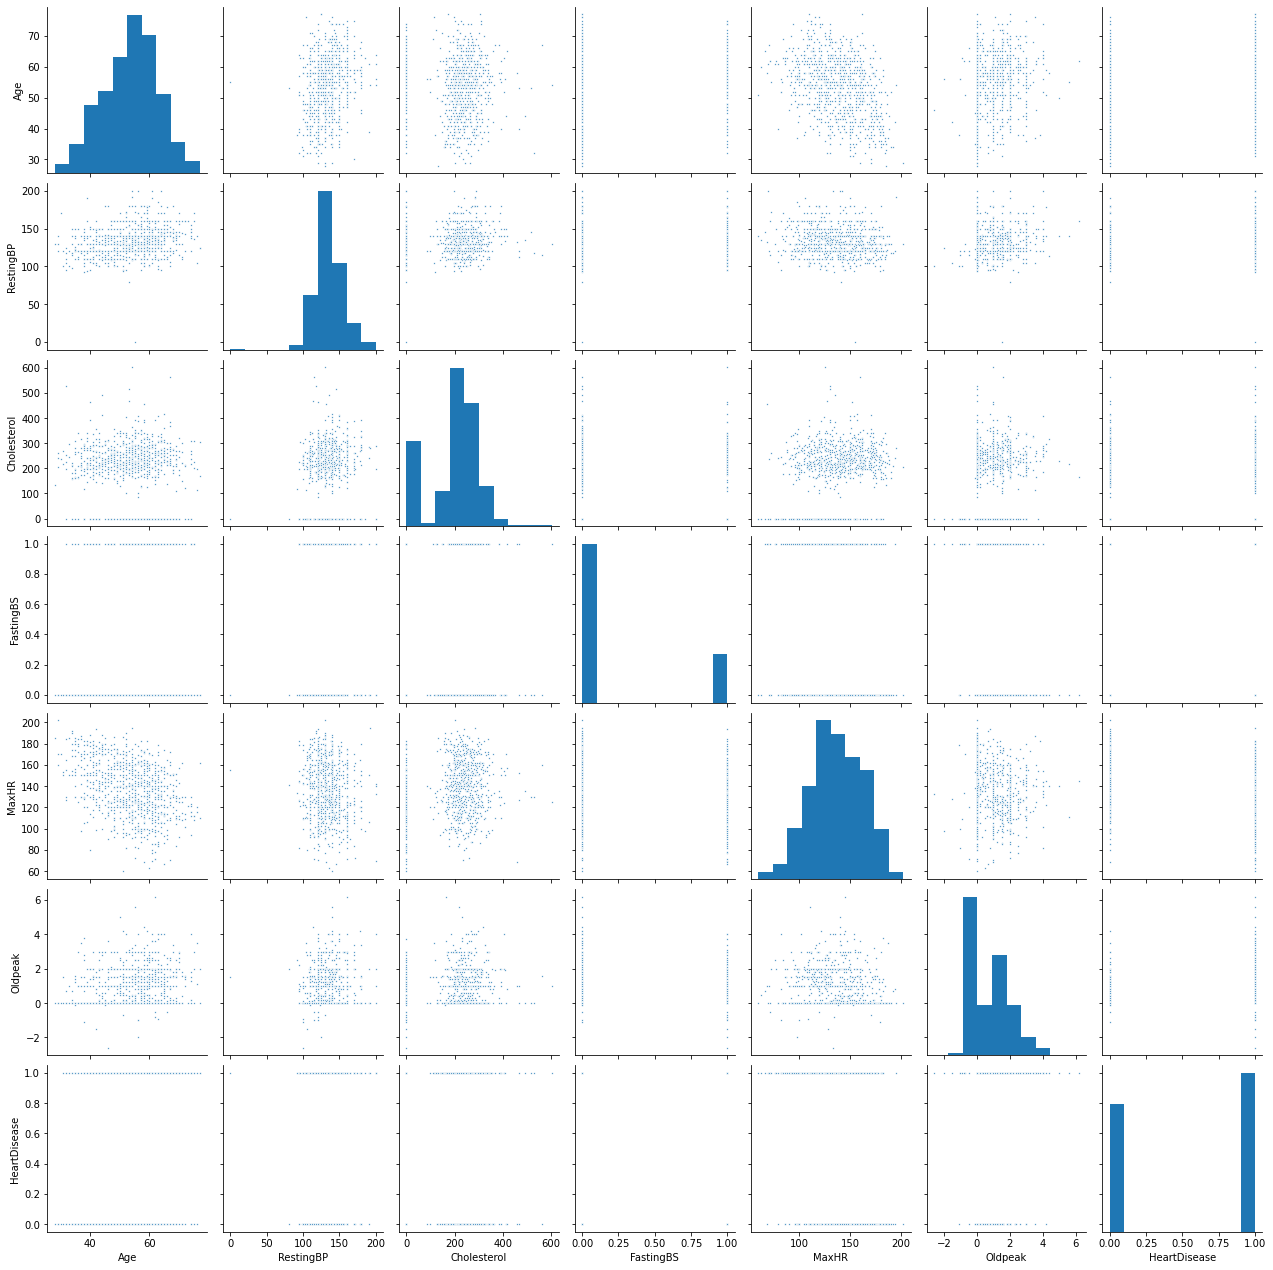

In [14]:

#plot the numeir features
sns.pairplot(datHeart[numeric_features], plot_kws={'s': 3});
#sns.pairplot(datHeart);
# get Correlation for all numeric values and the target
#target_feature=['MEDV']
#datHeart[numeric_features+target].corr()


               Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  \
Age           1.00       0.25        -0.10       0.20  -0.38     0.26   
RestingBP     0.25       1.00         0.10       0.07  -0.11     0.16   
Cholesterol  -0.10       0.10         1.00      -0.26   0.24     0.05   
FastingBS     0.20       0.07        -0.26       1.00  -0.13     0.05   
MaxHR        -0.38      -0.11         0.24      -0.13   1.00    -0.16   
Oldpeak       0.26       0.16         0.05       0.05  -0.16     1.00   
HeartDisease  0.28       0.11        -0.23       0.27  -0.40     0.40   
F            -0.06      -0.01         0.20      -0.12   0.19    -0.11   
M             0.06       0.01        -0.20       0.12  -0.19     0.11   
ASY           0.17       0.05        -0.12       0.13  -0.35     0.28   
ATA          -0.22      -0.05         0.15      -0.14   0.25    -0.26   
NAP          -0.01      -0.04        -0.01      -0.04   0.13    -0.11   
TA            0.03       0.05         0.02       0.

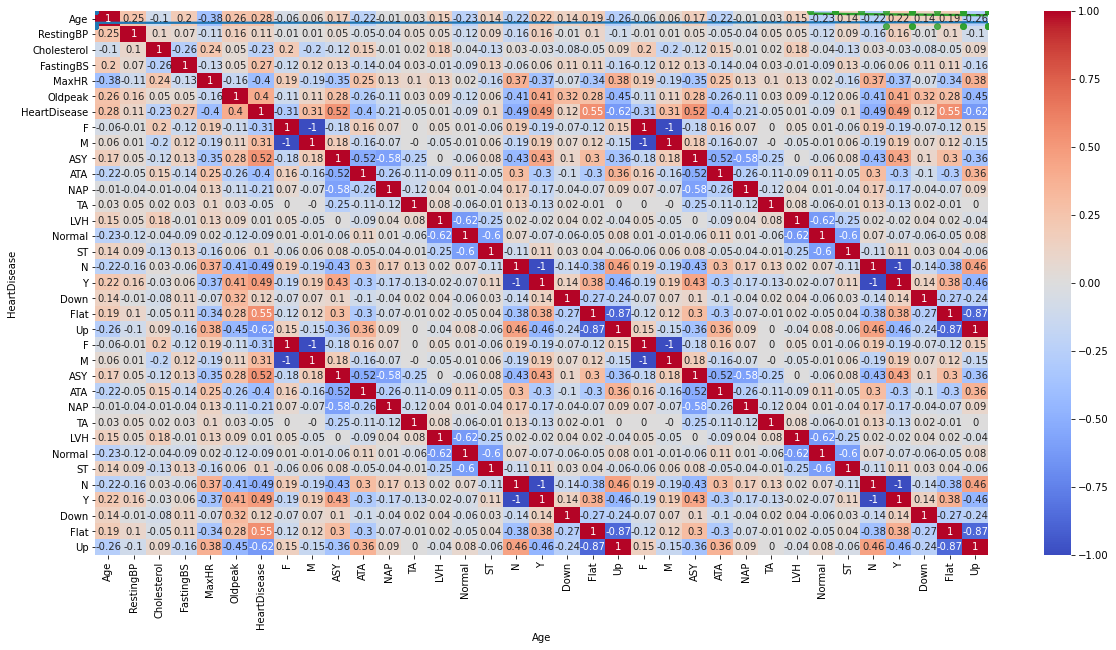

In [17]:
#correlation matrix 
correlation_matrix = datHeart.corr().round(2)
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
print(correlation_matrix)
#By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74) and RIVERCODE has the lowest coorelation (.18)
sns.regplot(y=datHeart['HeartDisease'],x=datHeart['Cholesterol'])

sns.regplot(y=datHeart['HeartDisease'],x=datHeart['MaxHR'])# strong negative coorelation between MEDV and LSTAT


sns.regplot(y=datHeart['HeartDisease'],x=datHeart['Age'])# strong positive coorelation between MEDV and RM

In [19]:
#spliting variables in to dependent and independent
x=datHeart.drop(['HeartDisease'], axis=1)
print(x)
y=datHeart['HeartDisease']
#print(y)
#print(datHeart)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  F  M  ASY  ATA  \
0     40        140          289          0    172      0.0  0  1    0    1   
1     49        160          180          0    156      1.0  1  0    0    0   
2     37        130          283          0     98      0.0  0  1    0    1   
3     48        138          214          0    108      1.5  1  0    1    0   
4     54        150          195          0    122      0.0  0  1    0    0   
..   ...        ...          ...        ...    ...      ... .. ..  ...  ...   
913   45        110          264          0    132      1.2  0  1    0    0   
914   68        144          193          1    141      3.4  0  1    1    0   
915   57        130          131          0    115      1.2  0  1    1    0   
916   57        130          236          0    174      0.0  1  0    0    1   
917   38        138          175          0    173      0.0  0  1    0    0   

     ...  NAP  TA  LVH  Normal  ST  N  Y  Down  Fla

In [ ]:
# Feature Importance — You can gain the significance of each feature of your dataset by using the Model Characteristics property.
#Feature value gives you a score for every function of your results, the higher the score the more significant or appropriate the performance variable is.
#Feature importance is the built-in class that comes with Tree Based Classifiers, we will use the Extra Tree Classifier to extract the top features for the dataset.

[0.06779777 0.06821325 0.07773439 0.03436821 0.06485023 0.06371101
 0.01125226 0.0121034  0.0376785  0.01410549 0.00702103 0.0036313
 0.00797535 0.00624779 0.00559211 0.02301249 0.02830989 0.00593958
 0.05093316 0.10980572 0.01444183 0.01094323 0.04713554 0.01930856
 0.0070956  0.00307361 0.00885547 0.00573719 0.00513805 0.01750257
 0.02661278 0.00521701 0.05216796 0.07648765]


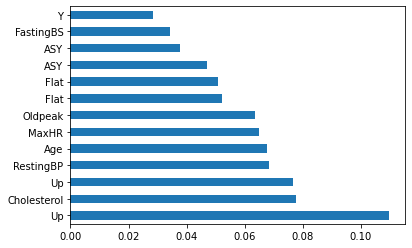

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [20]:

# check the  VIF for  X variables to check multicollinearity issues

vif_data = pd.DataFrame()
vif_data["feature"] = x .columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x .columns))]
print(vif_data)

        feature       VIF
0           Age  1.395579
1     RestingBP  1.124341
2   Cholesterol  1.235444
3     FastingBS  1.147103
4         MaxHR  1.556617
5       Oldpeak  1.534675
6             F       inf
7             M       inf
8           ASY       inf
9           ATA       inf
10          NAP       inf
11           TA       inf
12          LVH       inf
13       Normal       inf
14           ST       inf
15            N       inf
16            Y       inf
17         Down       inf
18         Flat       inf
19           Up       inf
20            F       inf
21            M       inf
22          ASY       inf
23          ATA       inf
24          NAP       inf
25           TA       inf
26          LVH       inf
27       Normal       inf
28           ST       inf
29            N       inf
30            Y       inf
31         Down       inf
32         Flat       inf
33           Up       inf


C:\Users\Admin\Desktop\class\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


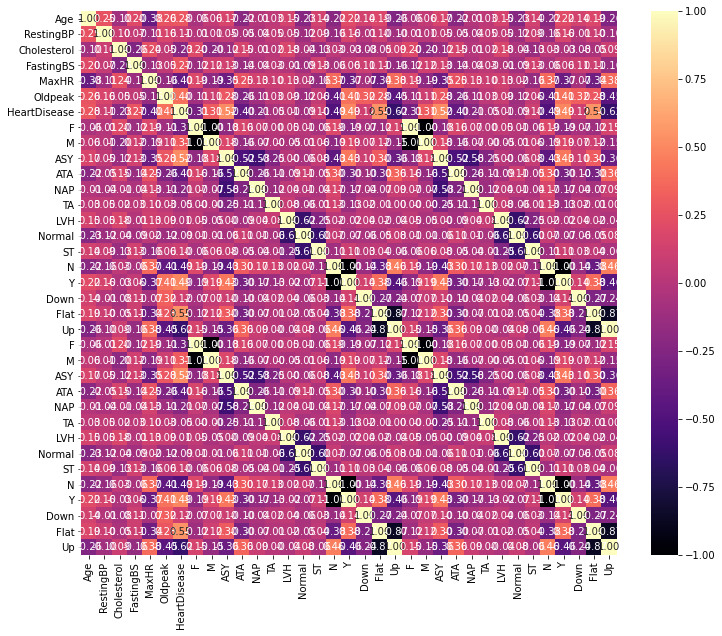

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(datHeart.corr(),annot=True,cmap="magma",fmt='.2f')

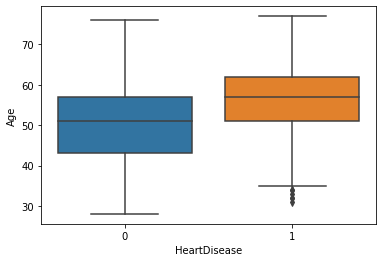

In [30]:
sns.boxplot(data=datHeart,x='HeartDisease',y='Age')

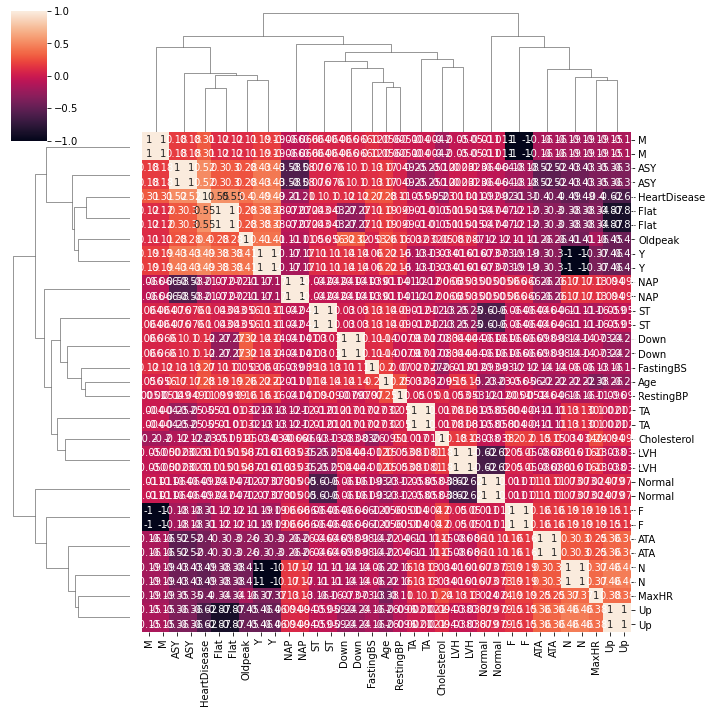

In [31]:
# clusterplot
sns.clustermap(datHeart.corr(),annot=True)

In [ ]:
#Pairplot
#sns.pairplot(datHeart)

In [ ]:
#Logistic Regression 

In [33]:
# splitting 

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=42)


In [34]:
# check the data 
x_train.head(), y_train.head()

(     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  F  M  ASY  ATA  \
 155   56        155          342          1    150      3.0  0  1    1    0   
 362   56        155            0          0     99      0.0  0  1    0    0   
 869   59        150          212          1    157      1.6  0  1    0    0   
 101   51        130          179          0    100      0.0  0  1    1    0   
 199   57        130          308          0     98      1.0  1  0    0    0   
 
      ...  NAP  TA  LVH  Normal  ST  N  Y  Down  Flat  Up  
 155  ...    0   0    0       1   0  0  1     0     1   0  
 362  ...    1   0    0       0   1  1  0     0     1   0  
 869  ...    1   0    0       1   0  1  0     0     0   1  
 101  ...    0   0    0       1   0  1  0     0     0   1  
 199  ...    0   1    0       1   0  1  0     0     1   0  
 
 [5 rows x 34 columns],
 155    1
 362    1
 869    0
 101    0
 199    0
 Name: HeartDisease, dtype: int64)

In [35]:
#. Normalization Min-Max Normalization method is used to Normalize the data. This method scales the data range to [0,1]. Standardization is also used on a feature-wise basis in most cases.

In [36]:
x_train=(x_train-np.min(x_train))/(np.max(x_train)-np.min(x_train)).values
x_test=(x_test-np.min(x_test))/(np.max(x_test)-np.min(x_test)).values

In [37]:
# principal component analysis

In [38]:
# Fitting into Model

In [39]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(x_train,y_train)

LogisticRegression()

In [46]:
#Prediction
#import plotly.graph_objects as go

ModuleNotFoundError: No module named 'plotly'

In [51]:
!pip3 install plotly

In [52]:
y_pred = logre.predict(x_test)
actual = []
predcition = []
for i,j in zip(y_test,y_pred):
  actual.append(i)
  predcition.append(j)
dic = {'Actual':actual,
       'Prediction':predcition
       }
result  = pd.DataFrame(dic)
import plotly.graph_objects as go
 
fig = go.Figure()
 
 
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',
                    name='Pred'))

In [ ]:
#The red dots represent the predicted values that is either 0 or 1 and the blue line & and dot represents the actual value of that particular patient. In the places where the red dot and blue dot do not overlap are the wrong predictions and where the both dots overlap those are the right predicted values.

In [ ]:
# Model Evaluation

In [53]:
# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8608695652173913


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        98
           1       0.90      0.85      0.88       132

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



In [ ]:
#The classification report of the model shows that 90% prediction of absence of heart disease was predicted correct and 81% of presence of heart disease was predicted correct.

[[ 86  12]
 [ 20 112]]


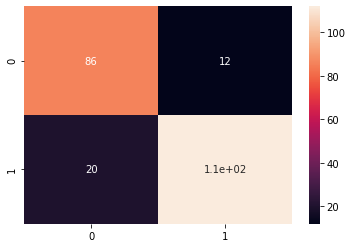

In [55]:
# confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
#The Confusion Matrix True Positive value is 86 and true Negative was 112. And the False Positive came out to be 12 and False Negative is 20.

In [ ]:
#ROC Curve ROC Curves summarizes the trade-off between the true positive rate and the false positive rate for the predictive model using different probability thresholds.

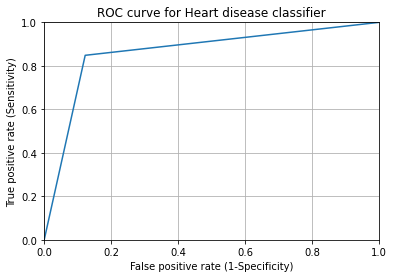

In [56]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [57]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred)

0.8630179344465059

In [ ]:
#Conclusion

In [70]:
#1. Coefficients
print(logre.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.datHeart(logre.coef_.ravel(),x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecientsts

[-1.09821616]


AttributeError: module 'pandas' has no attribute 'datHeart'

<Figure size 720x864 with 0 Axes>

In [ ]:
#2. AnalysisPreparing data for analysis

In [76]:
#Conclusion
#1. Coefficients

In [77]:
print(logre.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecientsts

[-1.09821616]


NameError: name 'coeffecientsts' is not defined

<Figure size 720x864 with 0 Axes>

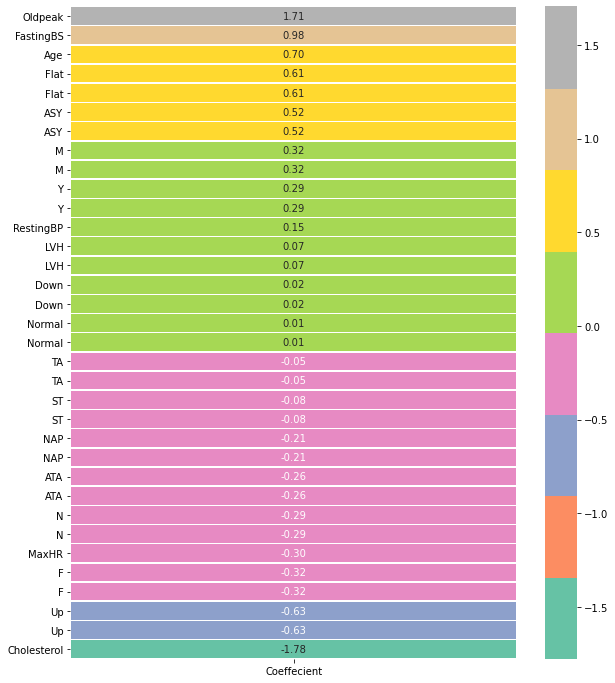

In [75]:
#According to this model the major features contributing in precision of predicting model are shown in the heatmap in Ascending order.

plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
sns.heatmap(coeffecients,annot=True,fmt='.2f',cmap='Set2',linewidths=0.5)

In [ ]:
#The important features contributing to the accuracy of the prediction are shown through the Heatmap in descending order. In silver color code, the most contributing feature, the chest pain types and maximum heart rate achieved proved to be more valuable by 1.71 units.

In [ ]:
#Conclusion
#The Area under the ROC curve is 86.3% which is somewhat satisfactory.
#The model predicted with 86.08% accuracy. The model is more specific than sensitive.
#According to this model the major features contributing in precision of predicting model are shown in the heatmap in Ascending order.
